In [ ]:
"""
Runge-Kutta 4th Order Method for solving ODEs
"""
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def rk4_step(f, t, y, h):
    """
    Perform one step of the 4th-order Runge-Kutta method.
    
    The RK4 method estimates the solution at the next time step by taking
    a weighted average of four different slope estimates:
    
    k1: slope at the beginning of the interval
    k2: slope at the midpoint, using k1 to estimate y at midpoint
    k3: slope at the midpoint, using k2 to estimate y at midpoint  
    k4: slope at the end of the interval, using k3 to estimate y at end
    
    Parameters:
    -----------
    f : function
        The derivative function dy/dt = f(t, y)
    t : float
        Current time
    y : float or array
        Current value of y
    h : float
        Step size
    
    Returns:
    --------
    float or array
        Next value of y
    """
    # Calculate the four slopes
    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)
    
    # Combine slopes with weights: 1/6, 1/3, 1/3, 1/6
    # This gives us the weighted average that makes RK4 fourth-order accurate
    # k2 and k3 are weighted more heavily because of Simpson's rule
    # see https://en.wikipedia.org/wiki/Simpson%27s_rule
    y_next = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return y_next


In [ ]:
def rk4_solve(f, t_span, y0, h):
    """
    Solve an ODE using the RK4 method over an interval.
    
    Parameters:
    -----------
    f : function
        The derivative function dy/dt = f(t, y)
    t_span : tuple
        (t_start, t_end) - the time interval
    y0 : float or array
        Initial condition
    h : float
        Step size
    
    Returns:
    --------
    t_values : array
        Time points
    y_values : array
        Solution values
    """
    t_start, t_end = t_span
    
    # Create array of time points
    # We add h to t_end to ensure we include the endpoint if it falls on a step
    t_values = np.arange(t_start, t_end + h, h)
    
    # Initialize solution array
    y_values = np.zeros(len(t_values))
    # Set initial condition for first value
    y_values[0] = y0
    
    # Apply RK4 method step by step
    for i in range(len(t_values) - 1):
        y_values[i + 1] = rk4_step(f, t_values[i], y_values[i], h)
    
    return t_values, y_values

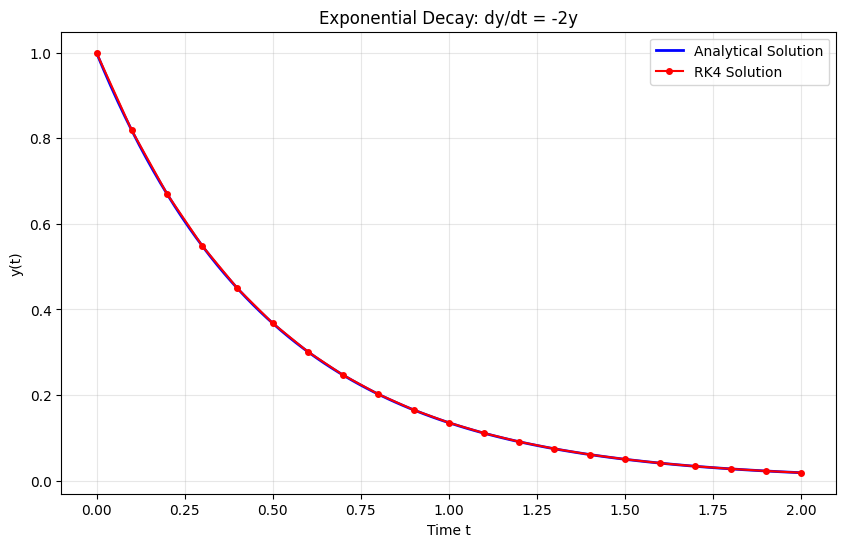

In [4]:
# Example usage for exponential decay
# Define the differential equation: dy/dt = -2y
# This has the analytical solution: y(t) = y0 * exp(-2t)
def exponential_decay(t, y):
    return -2 * y

# Solve with RK4
t_span = (0, 2)
y0 = 1.0
h = 0.1

t_rk4, y_rk4 = rk4_solve(exponential_decay, t_span, y0, h)

# Compare with analytical solution
t_exact = np.linspace(0, 2, 100)
y_exact = y0 * np.exp(-2 * t_exact)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, 'b-', label='Analytical Solution', linewidth=2)
plt.plot(t_rk4, y_rk4, 'ro-', label='RK4 Solution', markersize=4)
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.title('Exponential Decay: dy/dt = -2y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# Calculate error (for exponential decay example)
y_exact_at_points = y0 * np.exp(-2 * t_rk4)
error = np.abs(y_rk4 - y_exact_at_points)
print(f"Maximum error: {np.max(error):.6f}")
print(f"Final value - RK4: {y_rk4[-1]:.6f}")
print(f"Final value - Exact: {y_exact_at_points[-1]:.6f}")

Maximum error: 0.000006
Final value - RK4: 0.018317
Final value - Exact: 0.018316


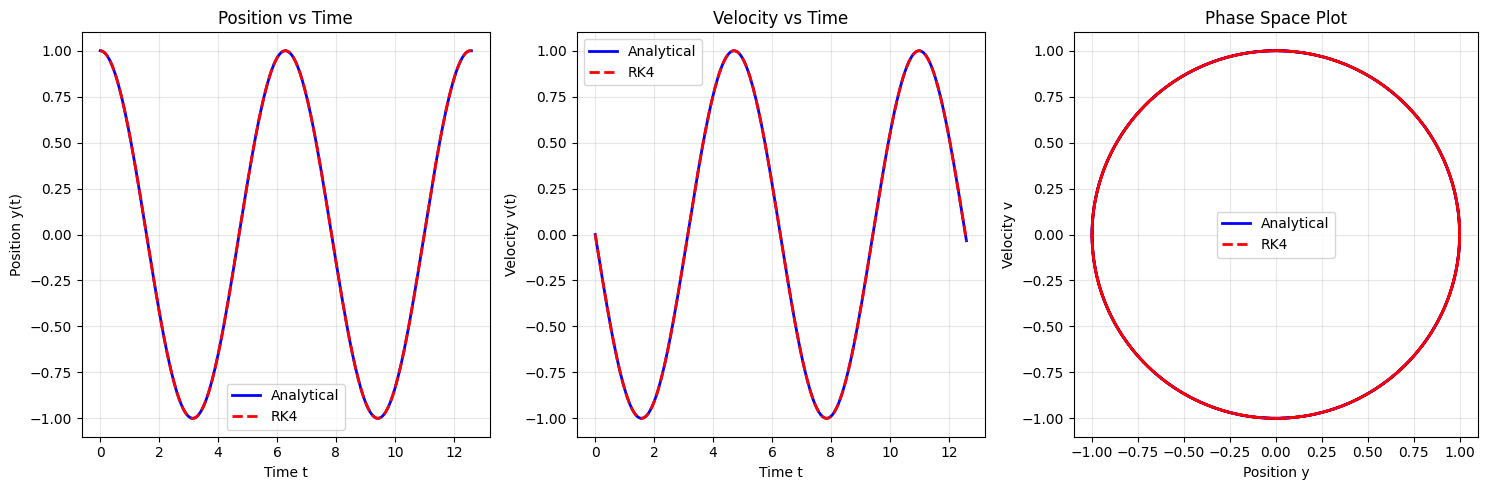

In [8]:
# Simple harmonic oscillator example

# This is a second-order ODE: d²y/dt² + y = 0
# We convert it to a system of first-order ODEs:
# dy/dt = v
# dv/dt = -y
# So our state vector is [y, v]

def harmonic_oscillator(t, state):
    """
    Simple harmonic oscillator: d²y/dt² + y = 0
    
    state[0] = y (position)
    state[1] = v (velocity)
    """
    y, v = state
    dydt = v
    dvdt = -y
    return np.array([dydt, dvdt])

# Modified RK4 for vector equations
def rk4_step_vector(f, t, y, h):
    """RK4 step for vector equations"""
    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)
    
    y_next = y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y_next

def rk4_solve_vector(f, t_span, y0, h):
    """RK4 solver for vector equations"""
    t_start, t_end = t_span
    t_values = np.arange(t_start, t_end + h, h)
    
    # Initialize solution array for vector case
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    
    for i in range(len(t_values) - 1):
        y_values[i + 1] = rk4_step_vector(f, t_values[i], y_values[i], h)
    
    return t_values, y_values

# Solve harmonic oscillator
t_span = (0, 4*np.pi)
y0 = np.array([1.0, 0.0])  # Initial position = 1, initial velocity = 0
h = 0.05

t_rk4, solution_rk4 = rk4_solve_vector(harmonic_oscillator, t_span, y0, h)

# Extract position and velocity
y_rk4 = solution_rk4[:, 0]
v_rk4 = solution_rk4[:, 1]

# Analytical solution
y_exact = np.cos(t_rk4)  # y(t) = cos(t)
v_exact = -np.sin(t_rk4)  # v(t) = -sin(t)

# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Position vs time
ax1.plot(t_rk4, y_exact, 'b-', label='Analytical', linewidth=2)
ax1.plot(t_rk4, y_rk4, 'r--', label='RK4', linewidth=2)
ax1.set_xlabel('Time t')
ax1.set_ylabel('Position y(t)')
ax1.set_title('Position vs Time')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Velocity vs time
ax2.plot(t_rk4, v_exact, 'b-', label='Analytical', linewidth=2)
ax2.plot(t_rk4, v_rk4, 'r--', label='RK4', linewidth=2)
ax2.set_xlabel('Time t')
ax2.set_ylabel('Velocity v(t)')
ax2.set_title('Velocity vs Time')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Phase space plot (position vs velocity)
ax3.plot(y_exact, v_exact, 'b-', label='Analytical', linewidth=2)
ax3.plot(y_rk4, v_rk4, 'r--', label='RK4', linewidth=2)
ax3.set_xlabel('Position y')
ax3.set_ylabel('Velocity v')
ax3.set_title('Phase Space Plot')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_aspect('equal')

plt.tight_layout()
plt.show()

In [7]:
# Check energy conservation (should be constant for harmonic oscillator)
energy_rk4 = 0.5 * v_rk4**2 + 0.5 * y_rk4**2
print(f"Energy at t=0: {energy_rk4[0]:.6f}")
print(f"Energy at t=end: {energy_rk4[-1]:.6f}")
print(f"Energy drift: {abs(energy_rk4[-1] - energy_rk4[0]):.6f}")

Energy at t=0: 0.500000
Energy at t=end: 0.500000
Energy drift: 0.000000


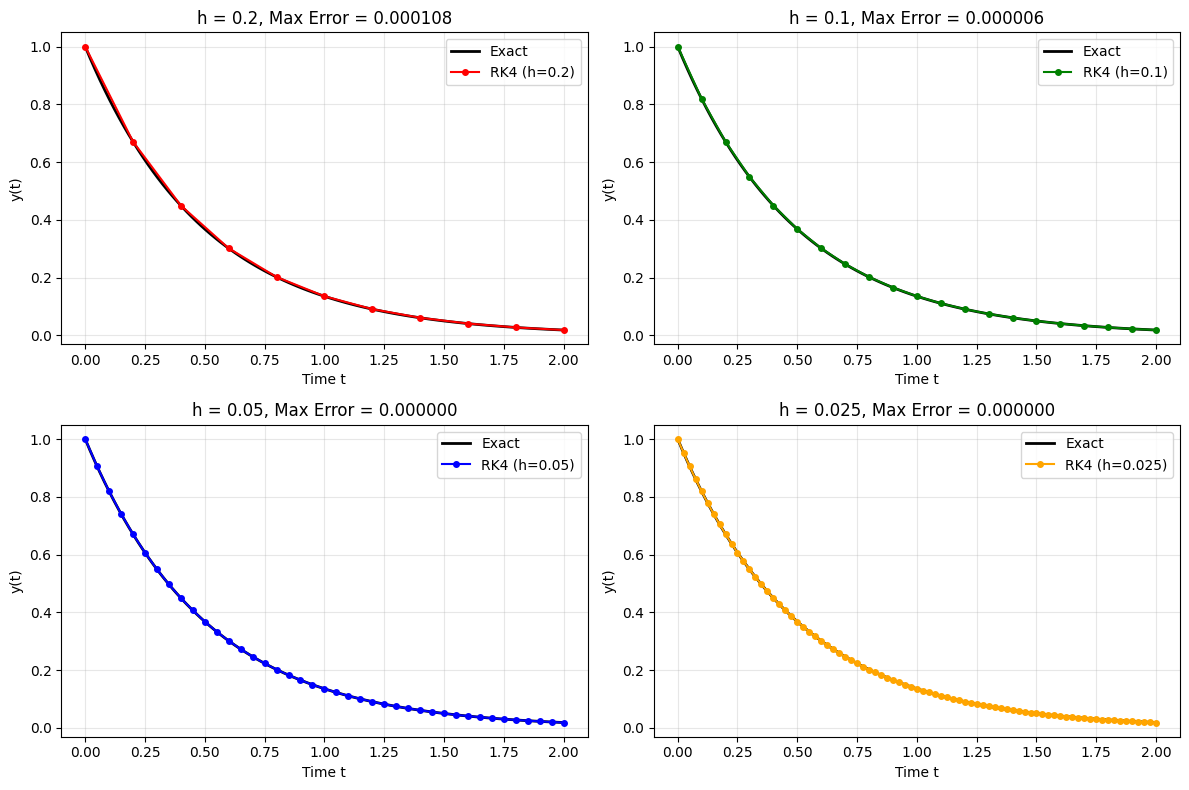

In [ ]:
# Examine the effect of step size on accuracy
step_sizes = [0.2, 0.1, 0.05, 0.025]
colors = ['red', 'green', 'blue', 'orange']

plt.figure(figsize=(12, 8))

for i, h in enumerate(step_sizes):
    t_rk4, y_rk4 = rk4_solve(exponential_decay, (0, 2), 1.0, h)
    plt.subplot(2, 2, i+1)
    
    # Plot exact solution
    t_exact = np.linspace(0, 2, 100)
    y_exact = np.exp(-2 * t_exact)
    plt.plot(t_exact, y_exact, 'k-', label='Exact', linewidth=2)
    
    # Plot RK4 solution
    plt.plot(t_rk4, y_rk4, 'o-', color=colors[i], 
             label=f'RK4 (h={h})', markersize=4)
    
    # Calculate and display error
    y_exact_at_points = np.exp(-2 * t_rk4)
    max_error = np.max(np.abs(y_rk4 - y_exact_at_points))
    
    plt.title(f'h = {h}, Max Error = {max_error:.6f}')
    plt.xlabel('Time t')
    plt.ylabel('y(t)')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


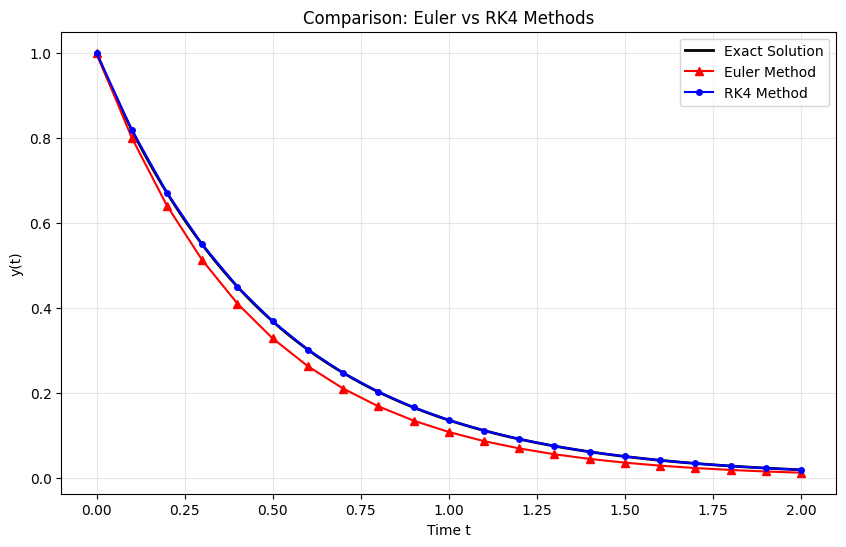

In [10]:
def euler_solve(f, t_span, y0, h):
    """Simple Euler's method for comparison"""
    t_start, t_end = t_span
    t_values = np.arange(t_start, t_end + h, h)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    
    for i in range(len(t_values) - 1):
        y_values[i + 1] = y_values[i] + h * f(t_values[i], y_values[i])
    
    return t_values, y_values

# Compare methods on exponential decay
h = 0.1
t_span = (0, 2)
y0 = 1.0

t_euler, y_euler = euler_solve(exponential_decay, t_span, y0, h)
t_rk4, y_rk4 = rk4_solve(exponential_decay, t_span, y0, h)

# Exact solution
t_exact = np.linspace(0, 2, 100)
y_exact = np.exp(-2 * t_exact)

plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, 'k-', label='Exact Solution', linewidth=2)
plt.plot(t_euler, y_euler, 'r^-', label='Euler Method', markersize=6)
plt.plot(t_rk4, y_rk4, 'bo-', label='RK4 Method', markersize=4)
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.title('Comparison: Euler vs RK4 Methods')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [12]:
# Calculate errors
y_exact_at_euler = np.exp(-2 * t_euler)
y_exact_at_rk4 = np.exp(-2 * t_rk4)

euler_error = np.max(np.abs(y_euler - y_exact_at_euler))
rk4_error = np.max(np.abs(y_rk4 - y_exact_at_rk4))

print(f"Euler method max error: {euler_error:.6f}")
print(f"RK4 method max error: {rk4_error:.6f}")
print(f"RK4 is {euler_error/rk4_error:.1f}x more accurate")

Euler method max error: 0.040199
RK4 method max error: 0.000006
RK4 is 6934.6x more accurate
